In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Please enter the path to your CSV file:  /kaggle/input/mushroom-classification/mushrooms.csv


Dataset loaded successfully.

Visualizing histograms...

Visualizing boxplots...

Visualizing violin plots...

Visualizing KDE plots...

Visualizing pair plot...

Visualizing count plots...


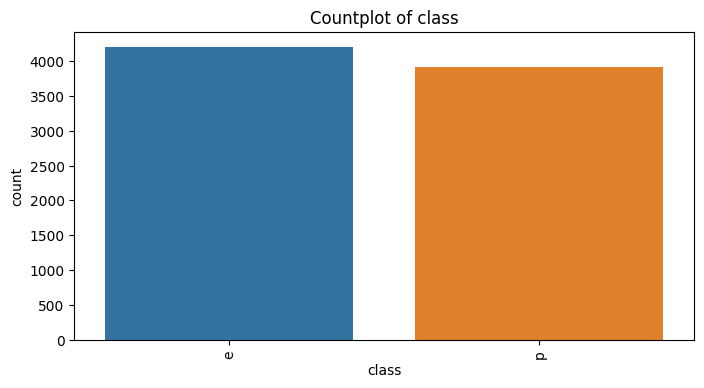

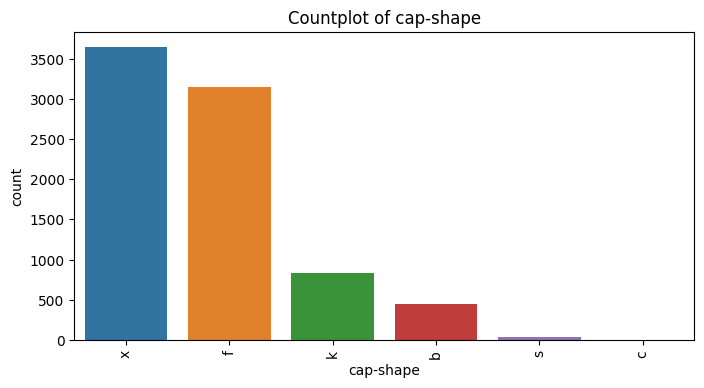

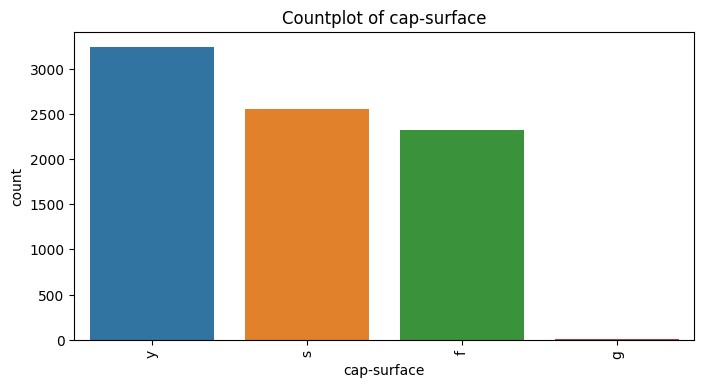

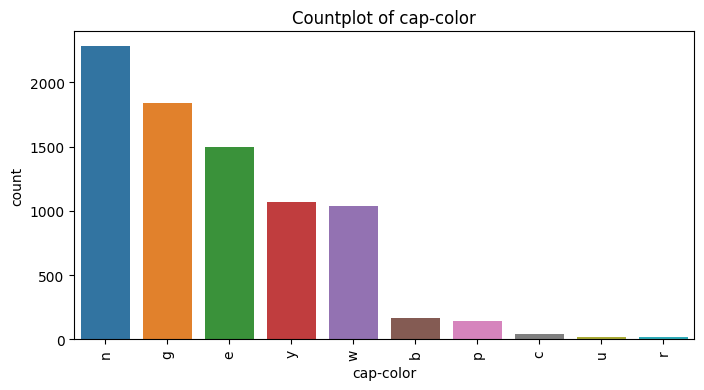

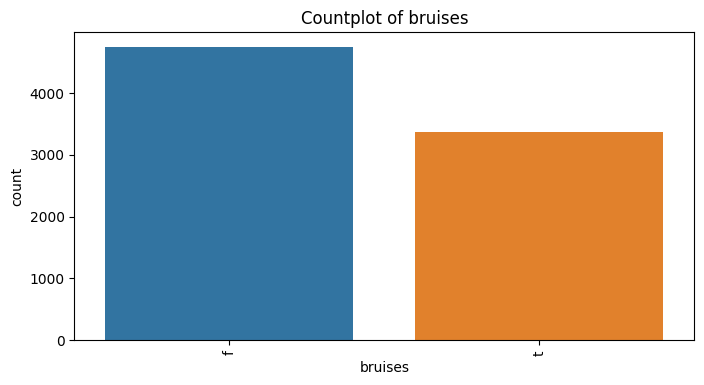

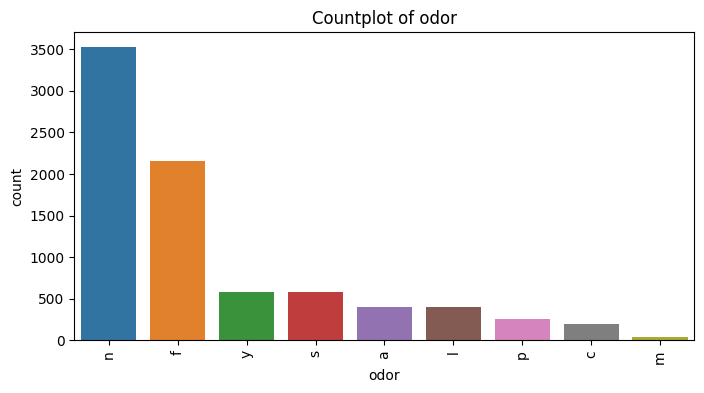

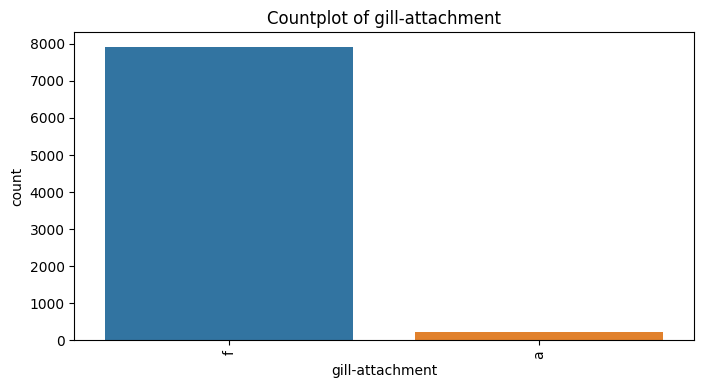

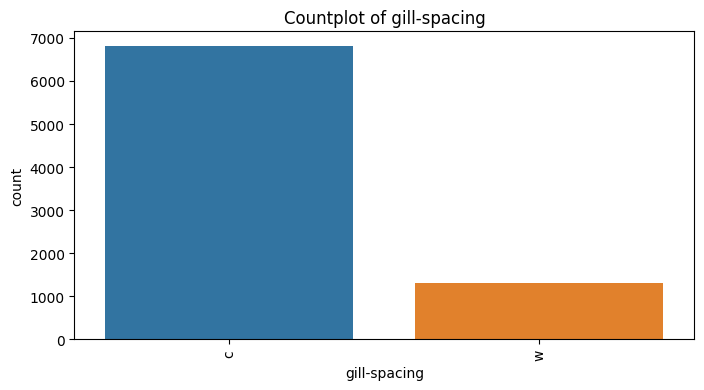

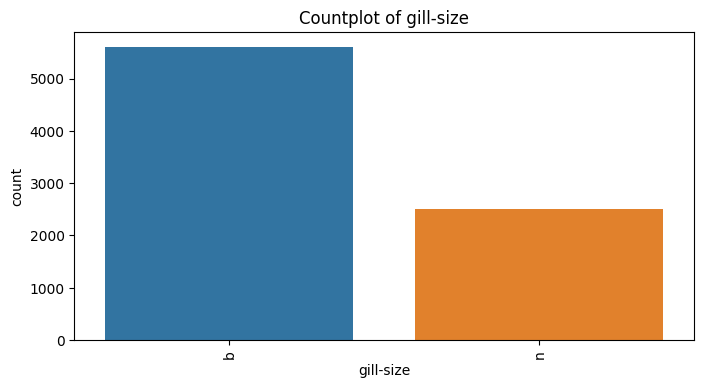

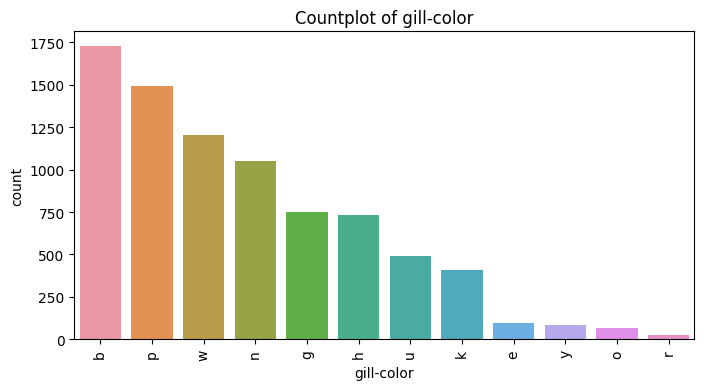

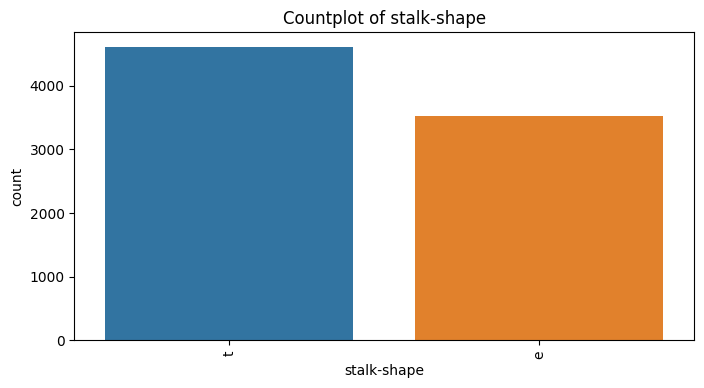

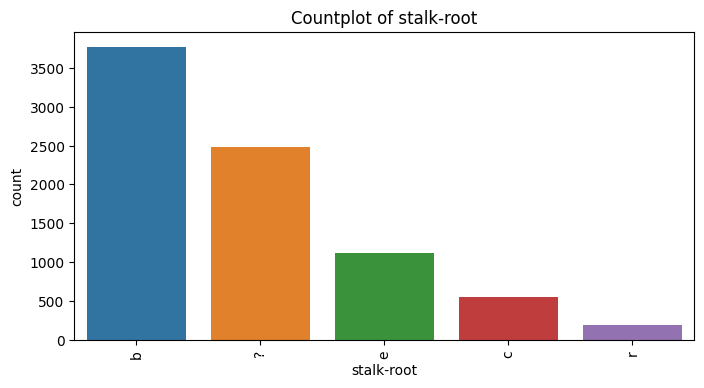

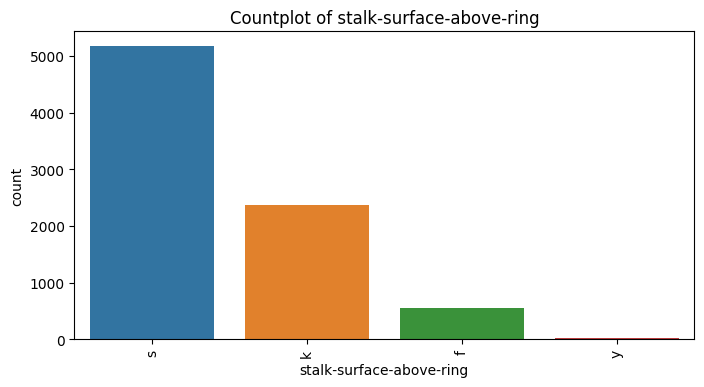

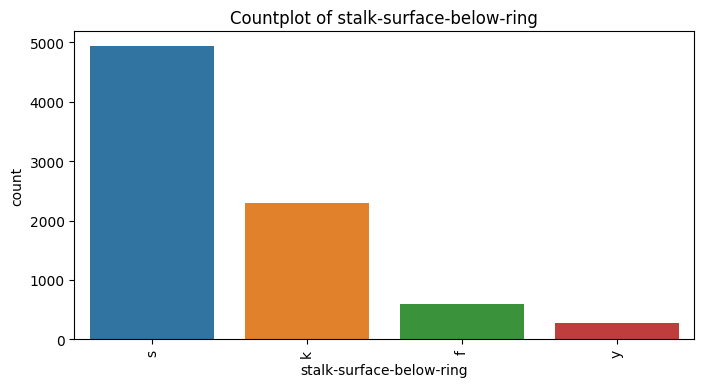

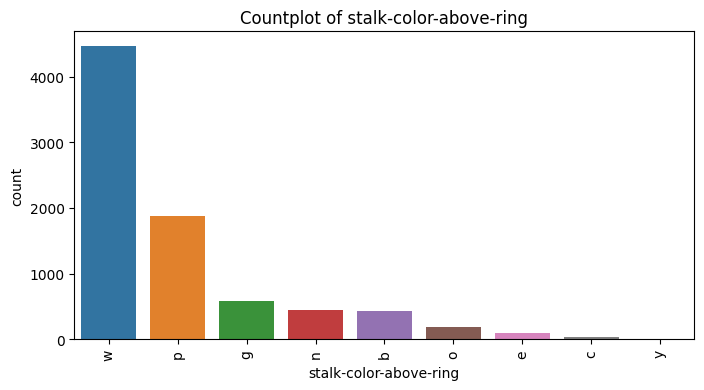

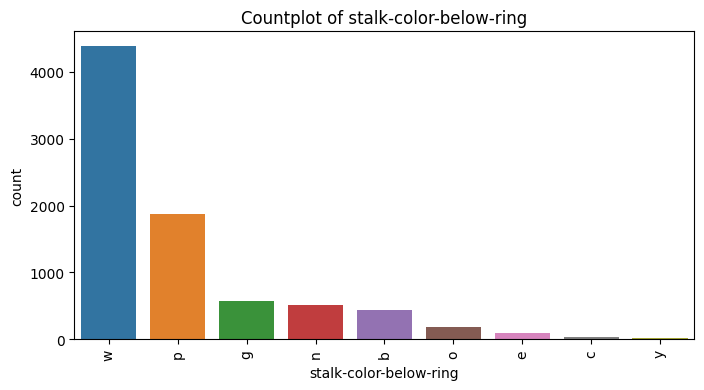

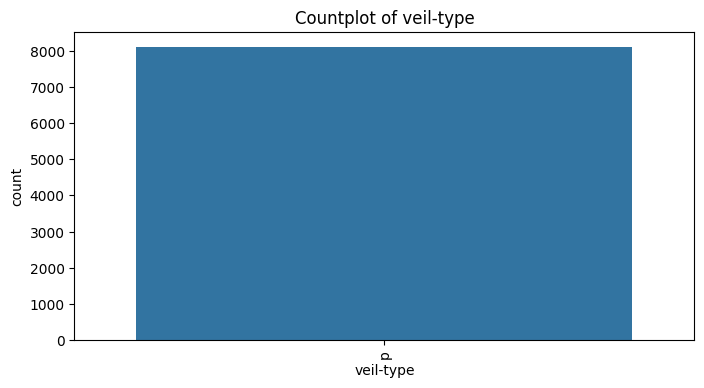

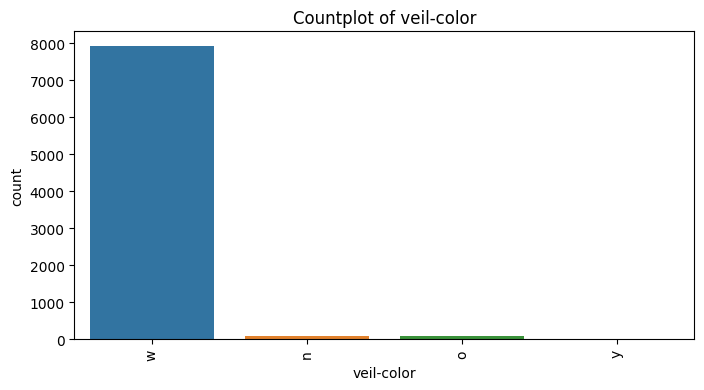

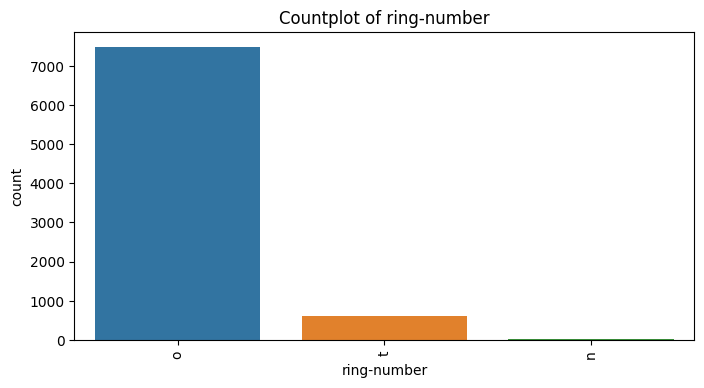

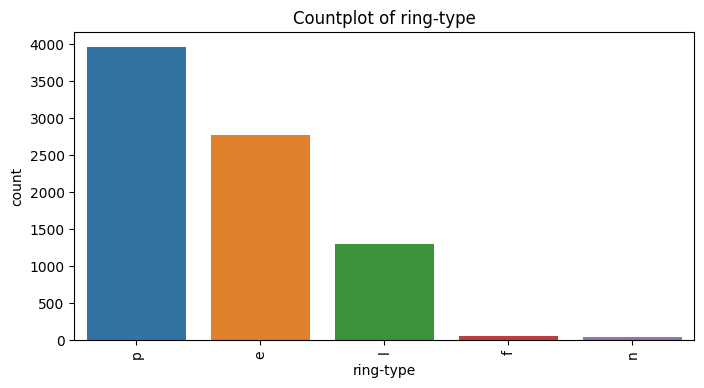

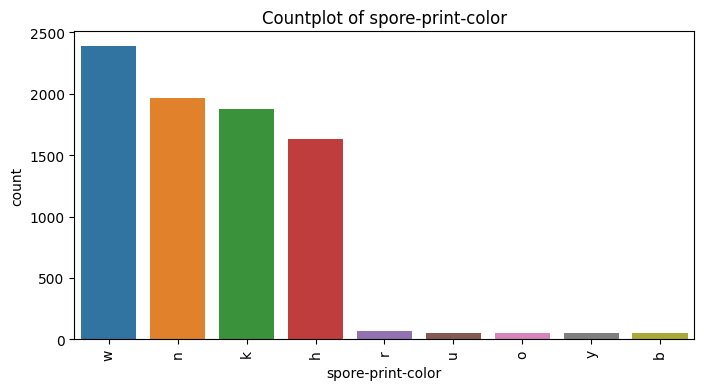

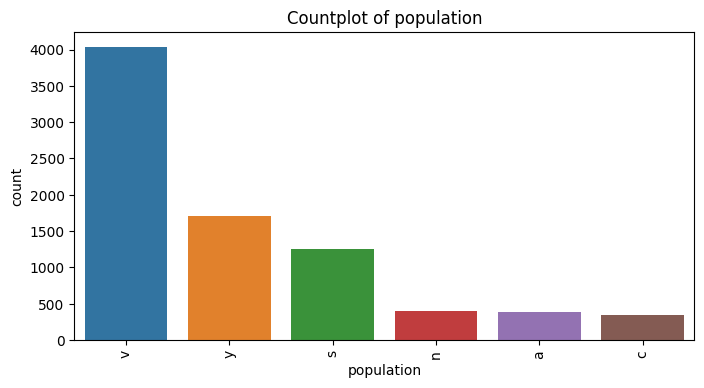

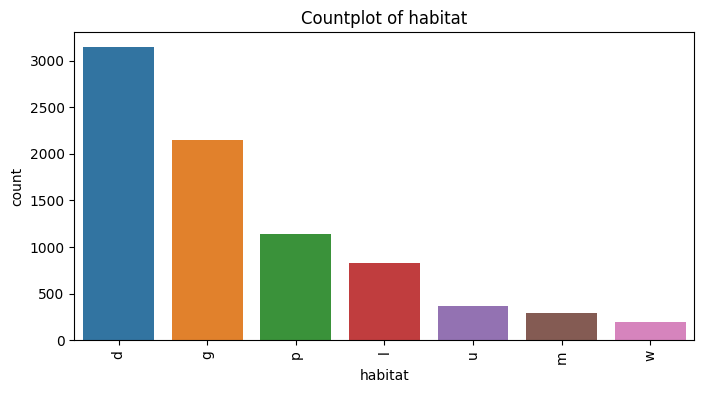


EDA results collected successfully.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get basic dataset information
def dataset_info(df):
    info = {}
    info["shape"] = df.shape
    info["data_types"] = df.dtypes
    info["first_5_rows"] = df.head()
    info["missing_values"] = df.isnull().sum()
    info["unique_values"] = {col: df[col].nunique() for col in df.columns}
    
    return info

# Function to get summary statistics
def summary_statistics(df):
    return df.describe()

# Function to get and plot correlation matrix for numeric columns
def correlation_matrix(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) == 0:
        return None
    
    corr = df[numeric_cols].corr()
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()
    
    return corr

# Function to plot histograms for numerical features
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        df[numeric_cols].hist(figsize=(14, 10), bins=30)
        plt.tight_layout()
        plt.show()

# Function to plot boxplots for numerical features
def plot_boxplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Function to plot violin plots for numerical features
def plot_violinplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.violinplot(x=df[col])
        plt.title(f'Violin plot of {col}')
        plt.show()

# Function to plot KDE (Kernel Density Estimation) plots for numerical features
def plot_kdeplots(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df[col], shade=True)
        plt.title(f'KDE plot of {col}')
        plt.show()

# Function to plot pair plots for numerical features
def plot_pairplot(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) > 1:
        sns.pairplot(df[numeric_cols])
        plt.show()

# Function to plot count plots for categorical features
def plot_countplots(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_cols:
        for col in categorical_cols:
            plt.figure(figsize=(8, 4))
            sns.countplot(x=df[col], order=df[col].value_counts().index)
            plt.title(f'Countplot of {col}')
            plt.xticks(rotation=90)
            plt.show()

# Function to return all EDA components
def perform_eda(df):
    results = {}
    results['info'] = dataset_info(df)
    results['summary_statistics'] = summary_statistics(df)
    results['correlation_matrix'] = correlation_matrix(df)
    
    # Visualizing data
    print("\nVisualizing histograms...")
    plot_histograms(df)
    
    print("\nVisualizing boxplots...")
    plot_boxplots(df)
    
    print("\nVisualizing violin plots...")
    plot_violinplots(df)
    
    print("\nVisualizing KDE plots...")
    plot_kdeplots(df)
    
    print("\nVisualizing pair plot...")
    plot_pairplot(df)
    
    print("\nVisualizing count plots...")
    plot_countplots(df)
    
    return results

# Load and run EDA on a user-uploaded dataset
if __name__ == "__main__":
    file_path = input("Please enter the path to your CSV file: ")
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        eda_results = perform_eda(df)
        print("\nEDA results collected successfully.")
    except Exception as e:
        print(f"Error loading dataset: {e}")
